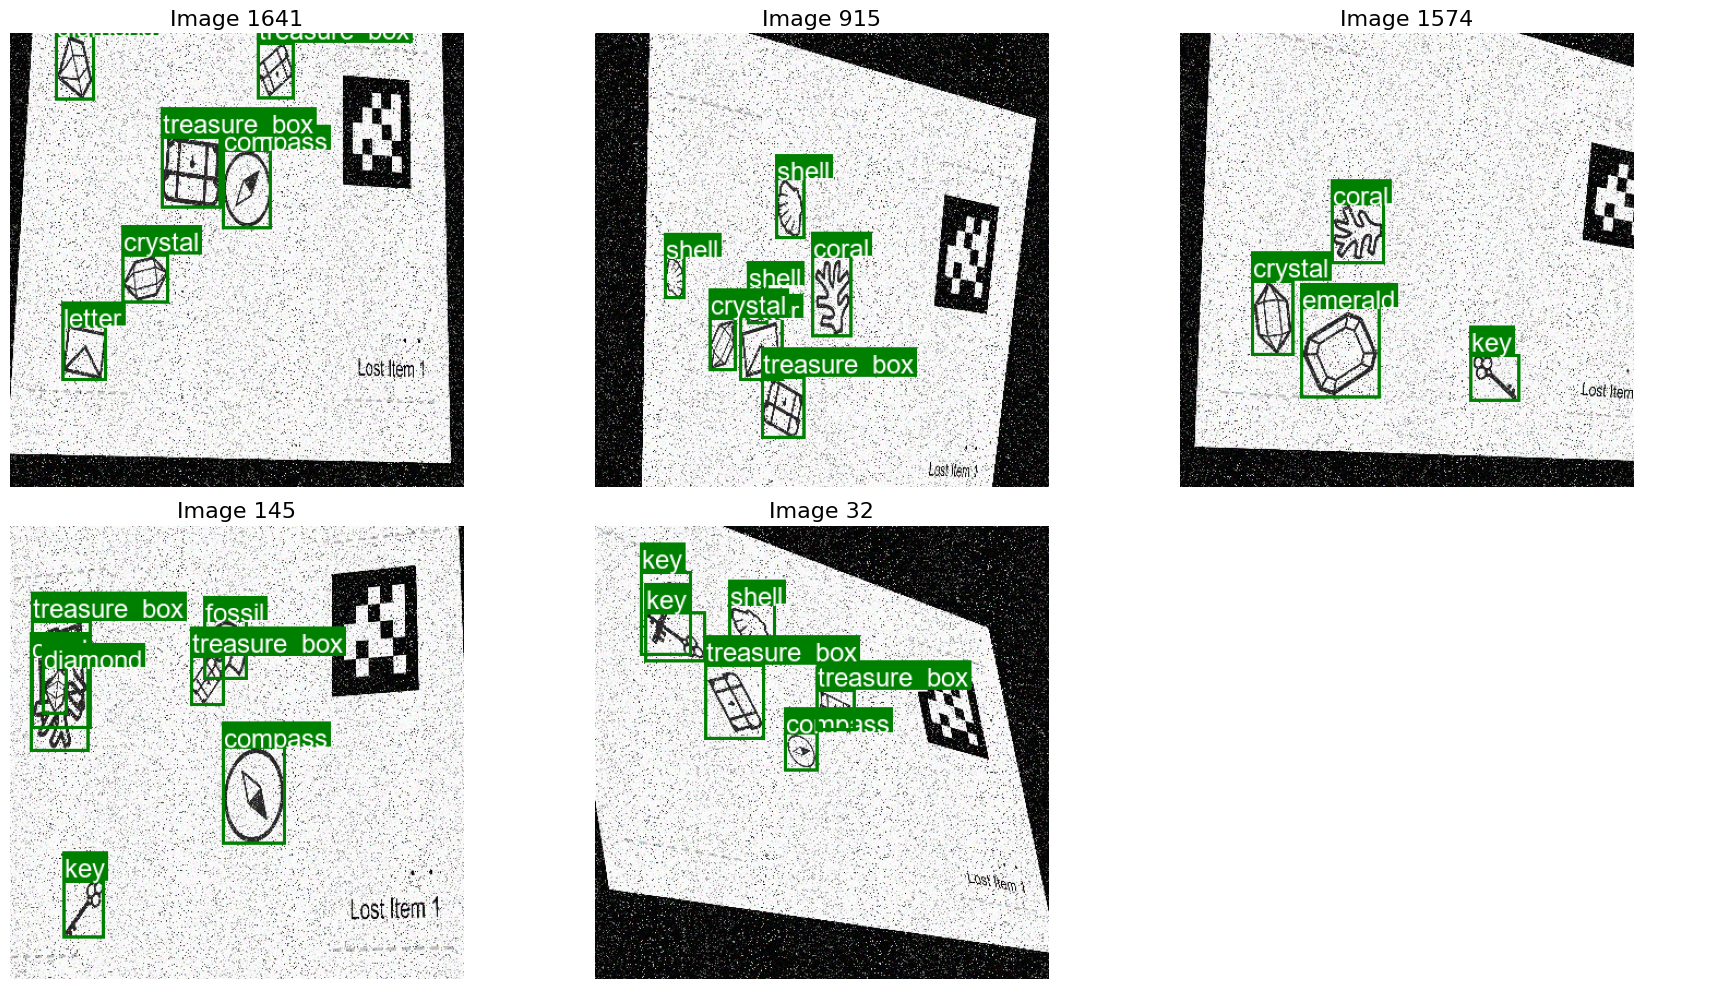

In [34]:
import os
import random
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Load font (fallback to default if unavailable)
try:
    font = ImageFont.truetype("arial.ttf", size=24)
except IOError:
    font = ImageFont.load_default()

# Class labels
class_labels = {
    0: "coin", 1: "compass", 2: "coral", 3: "crystal",
    4: "diamond", 5: "emerald", 6: "fossil", 7: "key",
    8: "letter", 9: "shell", 10: "treasure_box"
}

# Folder with images and label files
folder = "output"
image_files = [f for f in os.listdir(folder) if f.endswith(".png")]
image_numbers = [int(f.split("_")[1].split(".")[0]) for f in image_files]

# Randomly select 5 image numbers
selected_nums = random.sample(image_numbers, 5)

# Prepare display grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i in range(6):
    ax = axes[i]
    if i < len(selected_nums):
        num = selected_nums[i]
        image_path = os.path.join(folder, f"image_{num}.png")
        label_path = os.path.join(folder, f"image_{num}.txt")

        # Open image
        image = Image.open(image_path).convert("RGBA")
        draw = ImageDraw.Draw(image)
        bg_width, bg_height = image.size

        # Read labels
        with open(label_path, "r") as f:
            labels = f.readlines()

        for label in labels:
            cls_id, x_c, y_c, w_n, h_n = label.split()
            cls_id = int(cls_id)
            x_c, y_c, w_n, h_n = map(float, (x_c, y_c, w_n, h_n))

            # Convert YOLO coords to pixel box
            x_min = int((x_c - w_n / 2) * bg_width)
            y_min = int((y_c - h_n / 2) * bg_height)
            x_max = int((x_c + w_n / 2) * bg_width)
            y_max = int((y_c + h_n / 2) * bg_height)

            draw.rectangle([x_min, y_min, x_max, y_max], outline="green", width=3)

            # Draw label background
            bbox = draw.textbbox((0, 0), class_labels[cls_id], font=font)
            text_w = bbox[2] - bbox[0]
            text_h = bbox[3] - bbox[1]
            padding = 4
            rect_xy = [
                x_min,
                y_min - text_h - padding,
                x_min + text_w + padding,
                y_min
            ]
            draw.rectangle(rect_xy, fill="green")
            draw.text(
                (x_min + padding / 2, y_min - text_h - padding / 2),
                class_labels[cls_id],
                fill="white",
                font=font
            )

        # Show image in subplot
        ax.imshow(image)
        ax.set_title(f"Image {num}", fontsize=16)
        ax.axis("off")
    else:
        ax.axis("off")  # Hide unused subplot

plt.tight_layout()
plt.show()
